In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.loadtxt("hw6x.dat")

In [3]:
X.shape

(99, 2)

In [4]:
X = np.concatenate((X, np.ones((X.shape[0], 1))), axis=1) #Add bias column
X = X.T #transpose

In [5]:
y = np.loadtxt("hw6y.dat")
y = 2*y - 1 #change labels to -1, 1

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def gradient(w, x, y):
    z = y * (w.T @ X)
    return np.sum((sigmoid(z) - 1) * y * x, axis=1).reshape(w.shape)

In [8]:
def hessian(z, x, y):
    s = sigmoid(z)
    ss = (s*(1 - s))[0]
    h = np.zeros((3,3))
    for i in range(X.shape[1]):
        x = X[:, i:i+1]
        h += (x @ x.T)*ss[i]
    return h

In [9]:
def logloss(z):
    return np.sum(np.log(1 + np.exp(-z)))

In [10]:
def newton(w, X, y):
    z = y * (w.T @ X)
    return np.linalg.inv(hessian(z, X, y)) @ gradient(w, X, y)

# Optimization

In [11]:
sigma = 0.5
beta = 0.5
def update_w(w, X, y, alpha=0.5, optim_step=gradient):
    """
    Finds best alpha and updates w using optim_step (gradient descent or newton)
    """
    current_loss = logloss(y * (w.T @ X))
    dt = optim_step(w, X, y)
    grad = gradient(w, X, y)
    norm_squared = (grad.T @ dt)[0][0]
    epsilon = alpha * norm_squared
    wnew = w - alpha*dt
    diff_loss =  current_loss - logloss(y * (wnew.T @ X))
    #print("alpha: {} loss: {}, epsilon*sigma: {}".format(alpha, diff_loss, epsilon*sigma), sep=" ")
    while diff_loss < epsilon*sigma:
        alpha = alpha*beta
        epsilon = alpha*norm_squared
        wnew = w - alpha * dt
        diff_loss =  current_loss - logloss(y * (wnew.T @ X))
        
    print("alpha: {} loss: {:5f}, epsilon*sigma: {:5f}".format(alpha, diff_loss, epsilon*sigma), sep=" ")

    return wnew#, alpha

In [12]:
def optimize(X, y, optim_step=gradient, alpha=0.5):
    """
    Updates w until convergence
    """
    w = np.zeros((X.shape[0], 1))
    z = y * (w.T @ X)
    loss = logloss(z)
    diff_loss = loss
    print("Init - w: {}, loss: {}".format(w[:,0], loss))
    i = 0
    #while (not np.allclose(w, wprev)): #Run until convergence
    while abs(diff_loss) > 1e-6:    
        w = update_w(w, X, y, alpha, optim_step)#optim_step(w, X, y, alpha)
        z = y * (w.T @ X)
        prev_loss = loss
        loss = logloss(z)
        diff_loss = prev_loss - loss
        print("{}: w: {}, loss: {:4f} ({:4f})".format(i, w[:,0], loss, diff_loss))
        i+=1
    return w

In [13]:
w = optimize(X, y, optim_step=gradient, alpha=1)

Init - w: [0. 0. 0.], loss: 68.62157087543459
alpha: 0.00390625 loss: 11.953206, epsilon*sigma: 10.331443
0: w: [ 0.18620722  0.21456341 -0.00195312], loss: 56.668365 (11.953206)
alpha: 0.00390625 loss: 6.632664, epsilon*sigma: 5.506801
1: w: [ 0.08052121  0.38305909 -0.06078808], loss: 50.035701 (6.632664)
alpha: 0.00390625 loss: 3.610910, epsilon*sigma: 2.710300
2: w: [ 0.17709062  0.49121035 -0.07311172], loss: 46.424790 (3.610910)
alpha: 0.0078125 loss: 3.214663, epsilon*sigma: 2.851986
3: w: [ 0.11592762  0.67924532 -0.14703205], loss: 43.210128 (3.214663)
alpha: 0.00390625 loss: 1.530132, epsilon*sigma: 1.486693
4: w: [ 0.21246209  0.72665231 -0.15399337], loss: 41.679996 (1.530132)
alpha: 0.0078125 loss: 1.164646, epsilon*sigma: 0.978154
5: w: [ 0.1735728   0.82707104 -0.21471699], loss: 40.515350 (1.164646)
alpha: 0.00390625 loss: 0.628903, epsilon*sigma: 0.496590
6: w: [ 0.22732101  0.85558216 -0.22805318], loss: 39.886447 (0.628903)
alpha: 0.015625 loss: 1.072366, epsilon*sig

In [14]:
w = optimize(X, y, optim_step=newton, alpha=1)

Init - w: [0. 0. 0.], loss: 68.62157087543459
alpha: 1 loss: 31.523825, epsilon*sigma: 27.819964
0: w: [ 0.43509696  0.62161752 -1.50983811], loss: 37.097746 (31.523825)
alpha: 1 loss: 4.006983, epsilon*sigma: 3.384508
1: w: [ 0.64372727  0.95944716 -2.21834632], loss: 33.090763 (4.006983)
alpha: 1 loss: 0.491925, epsilon*sigma: 0.447484
2: w: [ 0.74137714  1.13493588 -2.55431051], loss: 32.598839 (0.491925)
alpha: 1 loss: 0.013230, epsilon*sigma: 0.012962
3: w: [ 0.75979248  1.1707512  -2.61847133], loss: 32.585609 (0.013230)
alpha: 1 loss: 0.000013, epsilon*sigma: 0.000013
4: w: [ 0.76037096  1.17194549 -2.62050954], loss: 32.585596 (0.000013)
alpha: 1 loss: 0.000000, epsilon*sigma: 0.000000
5: w: [ 0.76037154  1.17194674 -2.6205116 ], loss: 32.585596 (0.000000)


# Plot results

In [15]:
def f(x0, w):
    """
    for each point x0, return x1 
    such that x0*w0 + x1*w1 + w2 = 0
    to calculate separating line
    """
    w0 = w[0,0]
    w1 = w[1,0]
    b = w[2,0]
    return (-b - w0*x0)/w1
    

In [16]:
xs = np.arange(10)

In [17]:
ys = [f(x0, w) for x0 in xs]

Text(0.5, 1.0, 'Prediction')

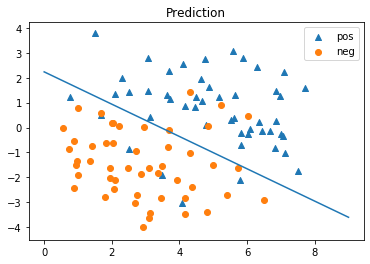

In [18]:
Xp = X[:, y == 1]
Xn = X[:, y == -1]
plt.scatter(Xp[0,:], Xp[1,:], marker='^', label='pos')
plt.scatter(Xn[0,:], Xn[1,:], marker='o', label='neg')
plt.plot(xs, ys)
plt.legend()
plt.title("Prediction")

# Area Under Curve

In [48]:
ys = sigmoid((w.T @ X)[0])
y_preds = np.ones(ys.shape)
y_preds[ys < 0.5] = -1

In [49]:
print("Acc: {:.4f}".format(np.sum(y_preds == y)/len(ys)))

Acc: 0.8889


In [50]:
correct_pairs = 0
for i in range(len(y_preds)):
    if y_preds[i] == -1:
        correct_pairs += ((y_preds[i+1:] == 1).sum()) #Add number of datapoints labeled +1 that are to the right
auc = correct_pairs / ((y_preds == 1).sum() * (y_preds == -1).sum())

In [51]:
print("AUC: {:.4f}".format(auc))

AUC: 0.8881
